# **TP1 : le workflow universel du machine learning**

# Context & Objectives

This TP aims to familiarize yourself with the "universal workflow of machine learning" (this expression is from Chollet et al. (2019) ). This workflow should be used as a step-by-step guideline to reach preliminary results on a new machine learning project. It is composed of the following steps:

1.   **Problem definition** : define the machine learning task based on available data, visualize and compute summary statistics on your data to better understand them ;
2.   **Dataset preparation** : perform some feature engineering if needed (such as variable selection), format your data in a way that can be fed into a machine-learning model, i.e. as a feature matrix or tensor **X**, and build a vector of labels *y* for supervised tasks, perform feature normalization and selection if needed (done in conjunction with step 3) ;
3.   **Evaluation protocol** : split **X** into a train / test partition (we remind you that the goal of this splitting is first to train a classifier by "fitting" it on the training subset, and secondly to make this trained classifier predict unseen digits from the test subset), choose performance metrics, define a cross-validation procedure, evaluate a baseline machine learning model (starting with off-the-shelf algorithms adapted to your problem and default model parameters) ;

4.   **Model evaluation** : run model training and test w.r.t the evaluation protocol, interpret performance result and re-iterate the worflow from step 2 as necessary.

In this TP, we will see how this workflow can be used to achieve first results  towards the development of these two (already existing) industrial products:

1.   The [CheckReader™](https://www.a2ia.com/en/a2ia-checkreader-0) system from the company Mitek : it is a global standard for advanced image analysis and intelligent recognition software used to seamlessly, precisely and securely process checks and other payment documentation by banks, financial institutions and other progressive corporations around the world. Here we will focus on the **recognition of handwritten digits from bank checks** ;

2.   (BONUS part) The [Faradai Platform](https://faradai.ai/?page=blog&subpage=forecasting-energy-consumption-with-ai) develops SaaS products for energy management. It has various modules to analyze energy usage or energy production ; **Energy Consumption Forecasting** is one of these tools. Forecasting is crucial for energy managers to track the success of energy conservation projects and to calculate the feasibility of energy saving investments. It is also important for energy budget managers to prepare highly accurate budgets for the next quarter or year and to procure cost-effective energy tariffs.

# 1. Digit recognition from images

For this first problem, we will be using the sklearn dataset called `load_digits`, downloaded as follows:

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [2]:
digits['images'].shape

(1797, 8, 8)

In [3]:
digits['target'].shape

(1797,)

and here is what a digit looks like:

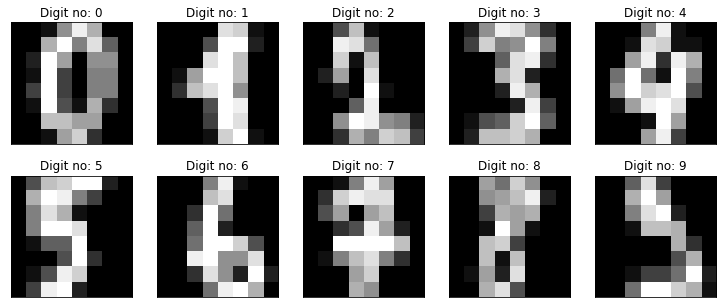

In [4]:
from matplotlib import pyplot as plt

plt.figure(1, figsize=(10,10))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.4)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[10+i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.title('Digit no: %i' %i)

The object ```digits``` is a bunch object. If this is the first time you hear about it, it is better you have a quick look to its [documentation](https://pypi.org/project/bunch/) before starting... 

## Problem definition

**Question 1.1** : please answer the following questions about the dataset:

1. what is the total number of samples in the dataset ?
2. what is the number of classes in the dataset ? and the number of samples per class ? Make comments on the balancedness of your dataset. 

Based on these information, define a machine learning task relevant to your product development.


In [5]:
# total nbr of samples in the dataset
print("Total number of samples in the dataset: ", digits['images'].shape[0])
# nbr of classes in the dataset
print("Number of classes in the dataset: ", len(set(digits['target'])))
# balancedness of the dataset
from collections import Counter
print("Number of samples per class: ", Counter(digits['target']))
print(">> The dataset is balanced")

Total number of samples in the dataset:  1797
Number of classes in the dataset:  10
Number of samples per class:  Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})
>> The dataset is balanced


A relevant machine learning task for this dataset is to predict the digit from the image. This is a classification problem with 10 classes (digits from 0 to 9).
=> Multiclass single-label supervised classification problem.

**Question 1.2** : please answer the following questions about the images:

1.   what is the size of an image ?
2.   what is the type of a pixel value ? Comment.
3.   what is the image type and bit depth ?

In [6]:
# size of an image
print("Size of an image: ", digits['images'][0].shape)
# type of a pixel value
print("Type of a pixel value: ", type(digits['images'][0][0][0]))
print(">> The pixel values are integers between 0 and 16")
# image type and bit depth
print("Image type: ", digits['images'][0].dtype)
print("Bit depth: ", digits['images'][0].dtype.itemsize*8)

Size of an image:  (8, 8)
Type of a pixel value:  <class 'numpy.float64'>
>> The pixel values are integers between 0 and 16
Image type:  float64
Bit depth:  64


## Dataset preparation

**Question 1.3** : most standard machine learning algorithms impose a 2D feature matrix **X** as input data. Propose a way to build such a matrix for your dataset. In your code it will be a `np.ndarray` called `X`.

*tips: you need to flatten the image, i.e. to reshape all images in a `(total_samples, **nb_features**)` matrix, i.e. bis turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).*

In [7]:
# build a 2D feature matrix X
import numpy as np
def flatten_images(images) -> np.ndarray:
    return images.reshape(images.shape[0], -1)

X = flatten_images(digits['images'])
print("Shape of X: ", X.shape)

Shape of X:  (1797, 64)


## Evaluation protocol

**Question 1.4** : split `X` into train and test subsets using a 80/20 % train/test ratio. `X` will then be divided into `X_train` and `X_test`, and `y` into the corresponding labels `y_train` and `y_test`. This splitting can be done with the scikit [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. Take time to make you familiar with the different parameters of this function, especially the `stratify` parameter.

What is the size of the whole training/testing datasets and the size of each class? Comment the splitting results.

*tips : use the [Counter](https://docs.python.org/fr/3/library/collections.html#collections.Counter) class from the module collections*

In [8]:
# split X into train and test subsets, ratio 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, digits['target'],
                                                    test_size=0.2, random_state=42,
                                                    stratify=digits['target'])

print("Size of the whole training dataset: ", X_train.shape[0])

Size of the whole training dataset:  1437


**Question 1.5** : as evaluation metrics, we will use the n-class confusion matrix and the overall accuracy. This latter is defined as the sum of its diagonal elements divided by the sum of all elements.

In a code cell below, write a function `def compute_confusion_matrix(y_test, y_pred), ` where `y_pred` is the predicition by a `classifier` of some target labels `y_test`. We consider that the N classes are labelled with integers from 0 to N-1.

To help you, you can compare your function outputs with those from the sklearn function, implemented on the toy example below:

In [9]:
def compute_confusion_matrix(y_test, y_pred):
    # compute the confusion matrix
    confusion_matrix = np.zeros((len(set(y_test)), len(set(y_test))))
    for i in range(len(y_test)):
        confusion_matrix[y_test[i]][y_pred[i]] += 1
    # compute the overall accuracy
    overall_accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix) * 100
    return confusion_matrix, overall_accuracy

In [10]:
from sklearn import metrics

# print(metrics.accuracy_score(y_test_example,y_pred_example))

y_test_example = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred_example = [0, 0, 0, 0, 1, 1, 0, 2, 2]

result = metrics.confusion_matrix(y_test_example,y_pred_example)
res,ov = compute_confusion_matrix(y_test_example,y_pred_example)

print('Custom confusion matrix: \n',res)
print('Sklearn confusion matrix: \n',result)

print('\n')

print('Custom confusion matrix:',ov)
print('Sklearn confusion matrix:',metrics.accuracy_score(y_test_example,y_pred_example)*100)

Custom confusion matrix: 
 [[3. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]
Sklearn confusion matrix: 
 [[3 0 0]
 [1 1 1]
 [1 1 1]]


Custom confusion matrix: 55.55555555555556
Sklearn confusion matrix: 55.55555555555556


## Model evaluation

As explained in our introduction, it is good practice to start your evaluation with a simple off-the-shelf model called a baseline. Here we will use a famous classifier called [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (weird name for a classifier, but we will clarify this in the next TP)

Let's create it and train it using the `X_train` subset. For this first TP, do not worry about it, here is how this is done using `sklearn` tools:

In [11]:
# as we will see in TP2, LogisticRegression is quite tricky to make it optimally converge, this command line ignores warnings related to convergence problem
import warnings 
warnings.filterwarnings('ignore')

# Create a classifier: a LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

LogisticRegression()

Once trained, your `model` can be directly used to predict your labels on `X_test` as follows:

In [12]:
predicted = model.predict(X_test)

You can verify that this variable has the same shape as `y_test` so they can be directly compared:

In [13]:
print(y_test.shape)
print(predicted.shape)

(360,)
(360,)


Below, you can visualize a few randomly picked images that were either correctly classified (in green) or mis-classified (in red):

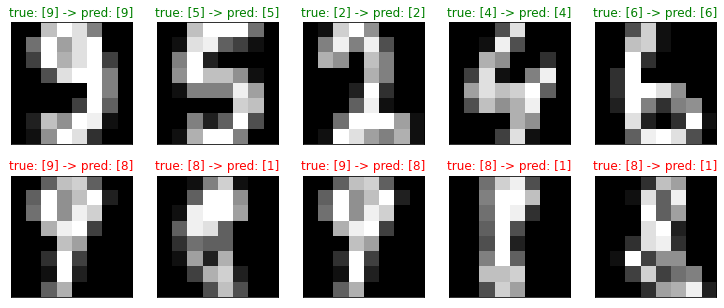

In [14]:
plt.figure(1, figsize=(10,10))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.4)

X_test_CC = X_test[(y_test - predicted == 0)] 
predicted_CC = predicted[(y_test - predicted == 0)] 
y_test_CC = y_test[(y_test - predicted == 0)] 

X_test_MC = X_test[(y_test - predicted != 0)] 
predicted_MC = predicted[(y_test - predicted != 0)] 
y_test_MC = y_test[(y_test - predicted != 0)] 

nber_images=10

for i in range(nber_images):

    if i <nber_images/2:
      ind_test = np.random.randint(0,X_test_CC.shape[0],1)
      im = X_test_CC[ind_test,:].reshape(8,8)
      pred = predicted_CC[ind_test]
      y_t = y_test_CC[ind_test]
    else:
      ind_test = np.random.randint(0,X_test_MC.shape[0],1)
      im = X_test_MC[ind_test,:].reshape(8,8)
      pred = predicted_MC[ind_test]
      y_t = y_test_MC[ind_test]

    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( im , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if y_t==pred:
      ax.set_title('true: {} -> pred: {}'.format(y_t,pred), color='g')
    else:
      ax.set_title('true: {} -> pred: {}'.format(y_t,pred), color='r')

**Question 1.6** : let's now compute quantitative results on the test subset `y_test` using the n-class confusion matrix and overall accuracy implemented above. Evaluate for each class the rate of correct classification and comment the obtained results.

In [15]:
# quantitative results on the test subset y_test
# evaluate correct classification rate for each class

def accuracy_per_class(confusion_matrix, y):
    accuracy_per_class = np.zeros((len(set(y))))
    for i in range(len(set(y))):
        accuracy_per_class[i] = confusion_matrix[i][i] / np.sum(confusion_matrix[i])
    return accuracy_per_class

#n-class confusion matrix
confusion_matrix, overall_accuracy = compute_confusion_matrix(y_test, predicted)
print('Confusion matrix: \n',confusion_matrix)

print('Accuracy per class: \n',accuracy_per_class(confusion_matrix, y_test))

Confusion matrix: 
 [[35.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 32.  0.  1.  0.  0.  0.  0.  3.  0.]
 [ 0.  0. 35.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 37.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 36.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 35.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 35.  0.  0.]
 [ 0.  4.  0.  0.  0.  1.  0.  0. 30.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1. 34.]]
Accuracy per class: 
 [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]


**Question 1.7** : perform the same operations as in Question 1.6 but now using the training subset `y_train`. Comment.


In [16]:
# quantitative results on the training subset y_train
# evaluate correct classification rate for each class

#n-class confusion matrix
confusion_matrix, overall_accuracy = compute_confusion_matrix(y_train, model.predict(X_train))
print('Confusion matrix: \n',confusion_matrix)

print('Accuracy per class: \n',accuracy_per_class(confusion_matrix, y_train))

Confusion matrix: 
 [[142.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 146.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 142.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 146.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 145.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 145.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 145.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 143.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 139.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 144.]]
Accuracy per class: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Question 1.8** : within a `for` loop, repeat 5 times the splitting and evaluation processes (respectively from questions 1.4 and 1.6), and compute the median and standard deviation of the 5 resulting overall accuracies.

In [17]:
# do 5 different splits of the data and evaluate the accuracy for each split

accuracies = np.zeros(5)
for i in range(5):
    print(f"=== Split {i} ===")
    X_train, X_test, y_train, y_test = train_test_split(X, digits['target'],
                                                        test_size=0.2, random_state=42,
                                                        stratify=digits['target'])
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    confusion_matrix, overall_accuracy = compute_confusion_matrix(y_test, predicted)
    print(f"Accuracy per class, split: ", accuracy_per_class(confusion_matrix, y_test))
    print(f"Overall accuracy, split: ", overall_accuracy)
    accuracies[i] = overall_accuracy

print("=== Results ===")
print(f"Median accuracy: {np.median(accuracies)}")
print(f"Standard deviation: {np.std(accuracies)}")

=== Split 0 ===
Accuracy per class, split:  [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]
Overall accuracy, split:  95.83333333333334
=== Split 1 ===
Accuracy per class, split:  [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]
Overall accuracy, split:  95.83333333333334
=== Split 2 ===
Accuracy per class, split:  [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]
Overall accuracy, split:  95.83333333333334
=== Split 3 ===
Accuracy per class, split:  [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]
Overall accuracy, split:  95.83333333333334
=== Split 4 ===
Accuracy per class, split:  [0.97222222 0.88888889 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.85714286 0.94444444]
Overall accuracy, split:  95.8333333333

**Question 1.9** : the operation performed in question 1.8 is called a 5-fold cross validation, implemented in `sklearn` with the methods [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and `cross_val_score`. Reproduce your results from question 1.8 using this tool. Compare and comment the results with those of question 1.8.

In [18]:
# same as question 1.8 but using KFold and cross_val_score

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(model, X, digits['target'], cv=kf)
print(f"Median accuracy: {np.median(accuracies)}")
print(f"Standard deviation: {np.std(accuracies)}")

Median accuracy: 0.9611111111111111
Standard deviation: 0.0041929656728311926


**Question 1.10** : as a supplementary evaluation, apply basic transformations (e.g. negative, rotation, contrast reduction ..) to input images and see how it impacts predictive performance of the trained model. Comment some results.

In [19]:
import scipy.ndimage as ndimage

def rotate(image, angle):
    return ndimage.rotate(image, angle, reshape=False).flatten()

def negative(image):
    return np.negative(image).flatten()

In [20]:
# make 2 copies of the test set
X_test_neg = X_test.copy()
X_test_rot = X_test.copy()

# apply transformations to the copies
for i in range(X_test.shape[0]):
    X_test_neg[i] = negative(X_test[i])
    X_test_rot[i] = rotate(X_test[i].reshape(8,8), 90).flatten()

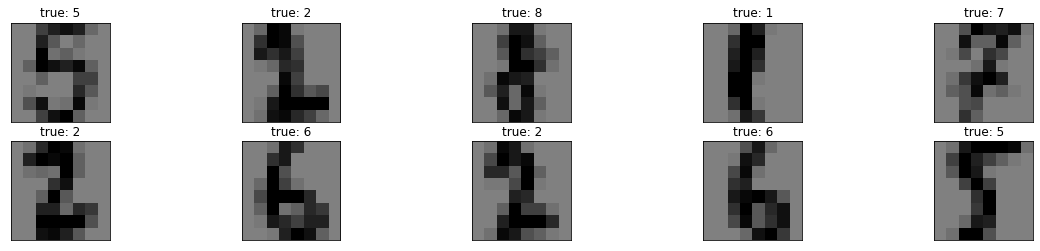

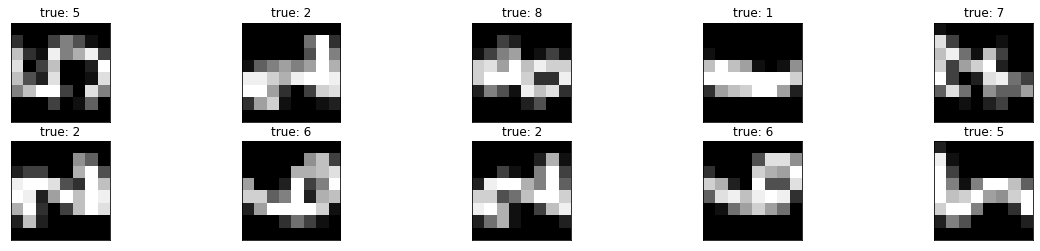

In [21]:
# plot digits 1 to 10 for new sets arrange in right order
nber_images = 10
plt.figure(figsize=(2 * nber_images, 4))
for i in range(nber_images):
    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( X_test_neg[i].reshape(8,8) , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    ax.set_title(f"true: {y_test[i]}")
plt.show()

plt.figure(figsize=(2 * nber_images, 4))
for i in range(nber_images):
    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( X_test_rot[i].reshape(8,8) , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    ax.set_title(f"true: {y_test[i]}")
plt.show()

In [22]:
# predict on the new sets
predicted_normal = model.predict(X_test)
predicted_neg = model.predict(X_test_neg)
predicted_rot = model.predict(X_test_rot)

# compute confusion matrices
confusion_matrix_neg, overall_accuracy_neg = compute_confusion_matrix(y_test, predicted_neg)
confusion_matrix_rot, overall_accuracy_rot = compute_confusion_matrix(y_test, predicted_rot)

# compute accuracy per class
accuracy_per_class_neg = accuracy_per_class(confusion_matrix_neg, y_test)
accuracy_per_class_rot = accuracy_per_class(confusion_matrix_rot, y_test)

# print results
print("=== Negative ===")
print(f"Confusion matrix: \n{confusion_matrix_neg}")
print(f"Accuracy per class: \n{accuracy_per_class_neg}")
print(f"Overall accuracy: {overall_accuracy_neg}")

print("=== Rotation ===")
print(f"Confusion matrix: \n{confusion_matrix_rot}")
print(f"Accuracy per class: \n{accuracy_per_class_rot}")
print(f"Overall accuracy: {overall_accuracy_rot}")

=== Negative ===
Confusion matrix: 
[[ 0. 13.  0. 13.  9.  0.  0.  0.  0.  1.]
 [16.  0.  2.  6.  0.  0.  5.  7.  0.  0.]
 [ 2.  0.  0.  0. 25.  1.  1.  6.  0.  0.]
 [ 0.  0.  0.  0. 31.  0.  6.  0.  0.  0.]
 [ 0.  0.  8. 14.  0.  1.  0.  0.  0. 13.]
 [ 0.  2. 23.  0.  6.  0.  5.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  7.  0. 27.]
 [11.  0.  1.  0.  0.  1. 22.  0.  0.  1.]
 [ 6.  2.  6.  3.  5.  4.  6.  3.  0.  0.]
 [ 0.  7.  7.  0. 12.  0. 10.  0.  0.  0.]]
Accuracy per class: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Overall accuracy: 0.0
=== Rotation ===
Confusion matrix: 
[[ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 35.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 37.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 35.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 35.  0.  0.  0.  

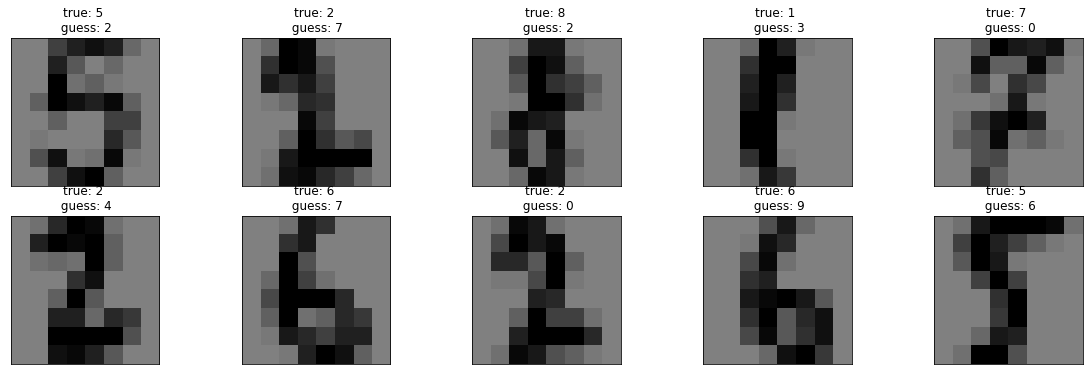

In [23]:
# plot guess and true values for the first 10 images of the negative set
nber_images = 10
plt.figure(figsize=(2 * nber_images, 6))
for i in range(nber_images):
    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( X_test_neg[i].reshape(8,8) , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    ax.set_title(f"true: {y_test[i]} \n guess: {predicted_neg[i]}")
plt.show()


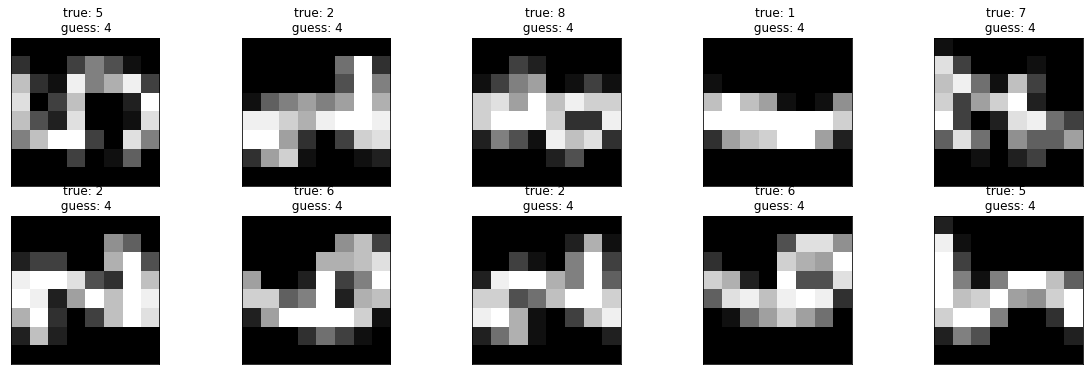

In [24]:
# plot guess and true values for the first 10 images of the rotation set
nber_images = 10
plt.figure(figsize=(2 * nber_images, 6))
for i in range(nber_images):
    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( X_test_rot[i].reshape(8,8) , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    ax.set_title(f"true: {y_test[i]} \n guess: {predicted_rot[i]}")
plt.show()

# SOURCES:

*   Chollet, F. (2018) "[Deep learning with python](https://www.manning.com/books/deep-learning-with-python)", Manning Publications **(available at the library of ENSTA Bretagne)**

*   https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

*   https://petebankhead.gitbooks.io/imagej-intro/content/chapters/bit_depths/bit_depths.html

